# Sets de entrenamiento y Modelos
* Link github: https://github.com/sebastiandres/ia_notebooks/1_error_datasets_y_modelos/1_error_datasets_y_modelos.ipynb
* Link mybinder: https://bit.ly/2Vf89oC

## Sobre jupyter notebook

Jupyter notebooks es un medio de desarrollo iterativo, que  permite mezclar código con texto, imágenes y video. 
Su facilidad de uso permite crear y descargar material para el aprendizaje individual y grupal.

*Importante*: cada celda se ejecuta con  `Alt + Enter` 

## Objetivos de Aprendizaje
1. Importancia de conocer el negocio y explorar los datos.
2. Técnicas para seleccionar un modelo predictivo.
3. Conocer el significado y utilidad de:
    * Datos de entrenamiento
    * Datos de validación (verificación)
    * Datos de testeo
    * Datos de predicción

## 0. Verificar disponibilidad de librerías y probar jupyter notebooks

In [18]:
import pandas as pd
import numpy as np
from matplotlib  import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
print("Versión de pandas: ", pd.__version__)
print("Versión de numpy: ", np.__version__)

Versión de pandas:  1.0.1
Versión de numpy:  1.18.1


In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# Fix the seed so everyone can reproduce the same results
np.random.seed(42)

Ejemplos de celdas de jupyter notebook con python:

In [21]:
a = 1
print(a)

1


In [22]:
for i in range(10):
    print(i, i**2)

0 0
1 1
2 4
3 9
4 16
5 25
6 36
7 49
8 64
9 81


## 1. Importar funcionalidades pre-existentes

In [23]:
from secret import get_data

Los datos pueden estar en un archivo csv o excel, o haberse descargado de intenet, o haberlos obtenido después de un largo proceso de proccesamiento. En esta caso, se obtienen simplemente con una función creada para este objetivo:

`def get_data()`

In [24]:
N_data = 10000
x_all, y_all = get_data(N_data)

In [25]:
len(x_all)

10000

In [26]:
x_all[:10]

array([ 4.96714153, -1.37264201,  6.49688738, 15.26030156, -2.30152975,
       -2.29136457, 15.85213416,  7.74435429, -4.61473586,  5.51560944])

In [27]:
y_all[:10]

array([ 3.18219423,  0.57236336,  5.52307677, 21.36448203, 14.67025557,
       -5.00178614, 30.86033913,  4.92763357, -8.09100798, 18.70155562])

#  Analisis exploratorio

In [28]:
df_all = pd.DataFrame(columns=["x","y"], data=np.array([x_all, y_all]).T)
df_all

,x,y
0,4.967142,3.182194
1,-1.372642,0.572363
2,6.496887,5.523077
3,15.260302,21.364482
4,-2.301530,14.670256
...,...,...
9995,112.971017,121.849290
9996,79.986547,98.760213
9997,92.926831,101.710370
9998,104.947655,127.082952


In [29]:
df_all.describe()

,x,y
count,9998.000000,9998.000000
mean,49.989640,55.126965
std,30.465204,32.130984
min,-29.792411,-26.617392
25%,24.973916,29.999804
50%,49.736307,55.216547
75%,75.177866,80.198397
max,122.306000,140.203578


¿Qué cosa le llama la atención de los datos?

## ¿Porqué siempre es bueno el análisis gráfico?

Existe un ejemplo clásico llamado el Cuarteto de Anscombe. 

Considere los siguientes 4 conjuntos de datos. 
¿Qué puede decir de los datos?

In [30]:
import pandas as pd
import os
filepath = os.path.join("data","anscombe.csv")
df = pd.read_csv(filepath)
df

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


Descripción de los datos, versión numpy:

In [31]:
import numpy as np
filepath = os.path.join("data","anscombe.csv")
data = np.loadtxt(filepath, delimiter=",", skiprows=1)
for i in range(4):
    x = data[:,2*i]
    y = data[:,2*i+1]
    slope, intercept = np.polyfit(x, y, 1)
    print("Grupo %d:" %(i+1))
    print("\tTiene pendiente m=%.2f e intercepto b=%.2f" %(slope, intercept))

Grupo 1:
	Tiene pendiente m=0.50 e intercepto b=3.00
Grupo 2:
	Tiene pendiente m=0.50 e intercepto b=3.00
Grupo 3:
	Tiene pendiente m=0.50 e intercepto b=3.00
Grupo 4:
	Tiene pendiente m=0.50 e intercepto b=3.00


Descripción de los datos, versión pandas:

In [32]:
import pandas as pd
import os
filepath = os.path.join("data","anscombe.csv")
df = pd.read_csv(filepath)
df[sorted(df.columns)].describe(include="all")

,x1,x2,x3,x4,y1,y2,y3,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,9.000000,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,3.316625,3.316625,3.316625,2.031568,2.031657,2.030424,2.030579
min,4.000000,4.000000,4.000000,8.000000,4.260000,3.100000,5.390000,5.250000
25%,6.500000,6.500000,6.500000,8.000000,6.315000,6.695000,6.250000,6.170000
50%,9.000000,9.000000,9.000000,8.000000,7.580000,8.140000,7.110000,7.040000
75%,11.500000,11.500000,11.500000,8.000000,8.570000,8.950000,7.980000,8.190000
max,14.000000,14.000000,14.000000,19.000000,10.840000,9.260000,12.740000,12.500000


Veamos ahora que nos puede decir 

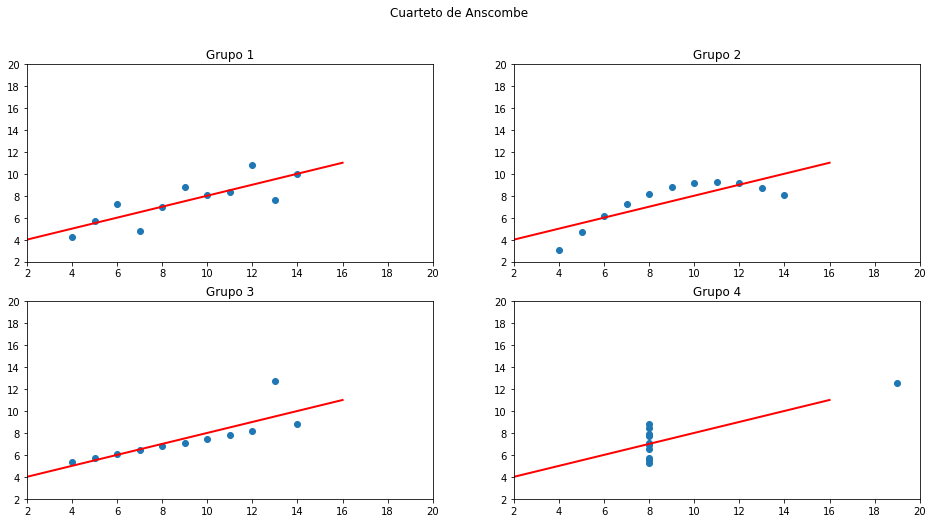

In [33]:
from matplotlib import pyplot as plt
import numpy as np

def my_plot():
    filepath = os.path.join("data","anscombe.csv")
    data = np.loadtxt(filepath, delimiter=",", skiprows=1)
    fig = plt.figure(figsize=(16,8))
    for i in range(4):
        x = data[:,2*i]
        y = data[:,2*i+1]
        plt.subplot(2, 2, i+1)
        plt.plot(x,y,'o')
        plt.xlim([2,20])
        plt.ylim([2,20])
        plt.title("Grupo %d" %(i+1))
        m, b = np.polyfit(x, y, 1)
        x_aux = np.linspace(2,16,20)
        plt.plot(x_aux, m*x_aux + b, 'r', lw=2.0)
    plt.suptitle("Cuarteto de Anscombe")
    plt.show()
    
my_plot()

## Análisis gráfico
Una de las primeras tareas que debemos hacer es realizar un análisis gráfico de los datos. Para esto existen muchas alternativas. Use su buen juicio.

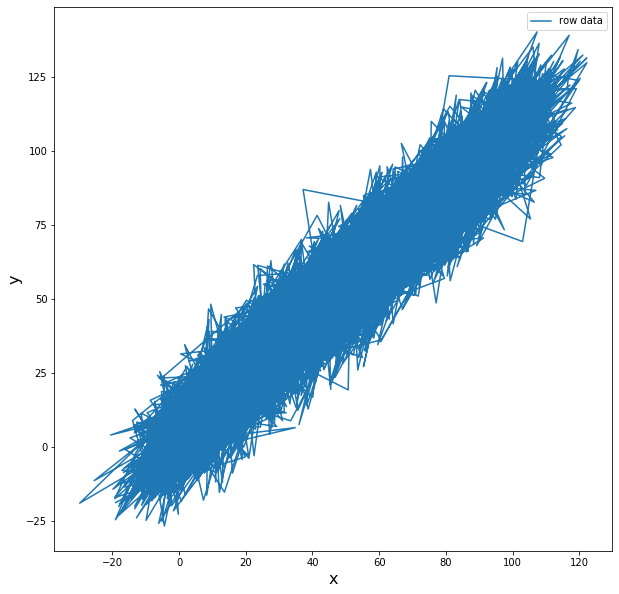

In [34]:
plt.figure(figsize=(10,10))
plt.plot(x_all, y_all, "-", label="row data")
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.legend()
plt.show()

### Lección 1: Los datos no suelen venir ordenados.

In [35]:
sorting_index = np.argsort(x_all)
x_sorted = np.array(x_all)[sorting_index]
y_sorted = np.array(y_all)[sorting_index]

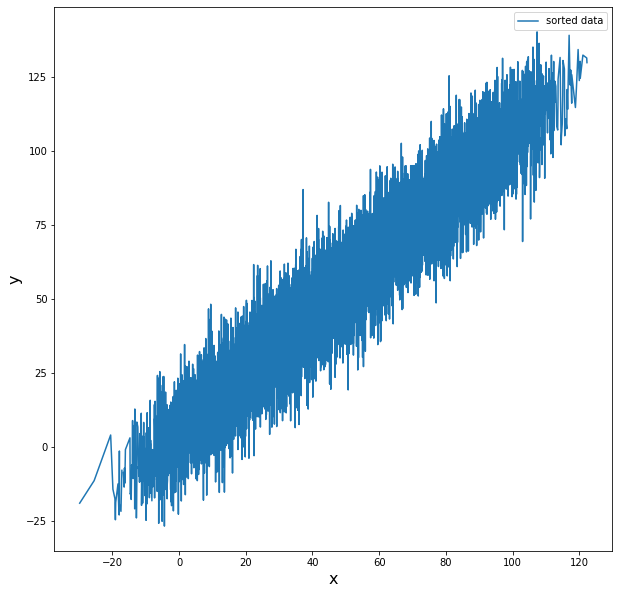

In [36]:
plt.figure(figsize=(10,10))
plt.plot(x_sorted, y_sorted, "-", label="sorted data")
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.legend()
plt.show()

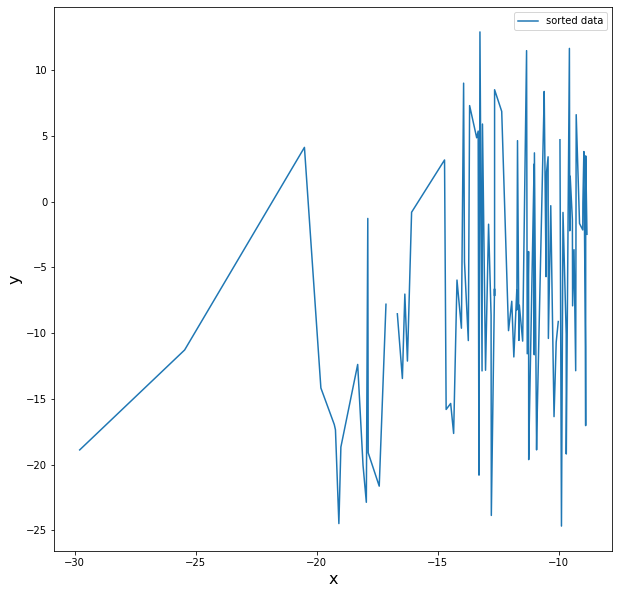

In [37]:
plt.figure(figsize=(10,10))
plt.plot(x_sorted[:100], y_sorted[:100], "-", label="sorted data")
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.legend()
plt.show()

## Preprocesando los datos

Después de ordenar, también es necesario eliminar los datos nulos (y valores fuera de rango)

In [38]:
np.isnan(x_sorted)

array([False, False, False, ..., False,  True,  True])

In [39]:
m_nan = np.logical_or(np.isnan(x_sorted), np.isnan(y_sorted))
m_not_nan = np.logical_not(m_nan)
x = x_sorted[m_not_nan]
y = y_sorted[m_not_nan]

In [40]:
len(x), len(y)

(9996, 9996)

In [41]:
x

array([-29.79241137, -25.45737703, -20.50822036, ..., 121.08617135,
       122.23338966, 122.30600024])

In [42]:
y

array([-18.88150606, -11.27969506,   4.12730797, ..., 132.37430964,
       131.41020371, 129.82929998])

#  Ajustando un modelo simple

Si definimos el grado del polinomio, es posible ajustar los coeficientes del polinomio para que "trate de pasar" por los datos.

In [43]:
# Do a polinomial fit
N = 1
z = np.polyfit(x, y, N)
polinomio = np.poly1d(z)

In [44]:
polinomio(np.array([0., 1., 2.0]))

array([5.01701562, 6.01937024, 7.02172487])

In [45]:
polinomio(2)

7.0217248650245825

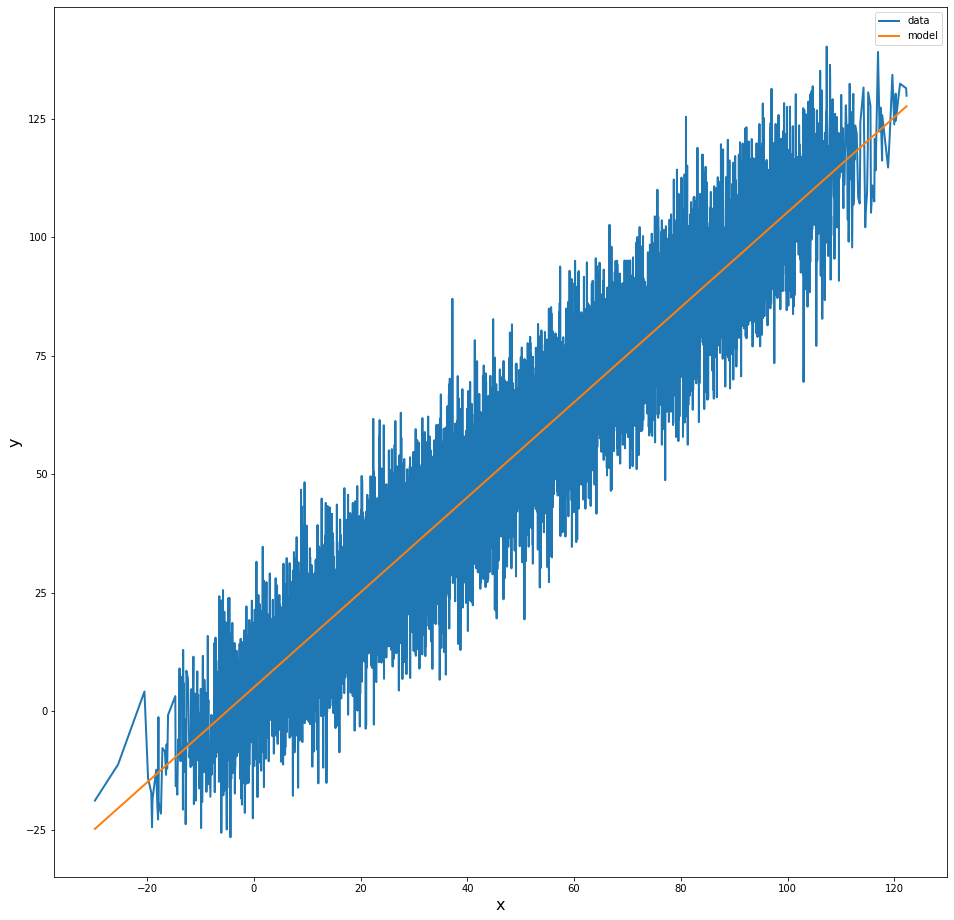

In [46]:
plt.figure(figsize=(16,16))
plt.plot(x, y, '-', lw=2.0, label="data")
plt.plot(x, polinomio(x),'-', lw=2.0, label="model")
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.legend()
plt.show()

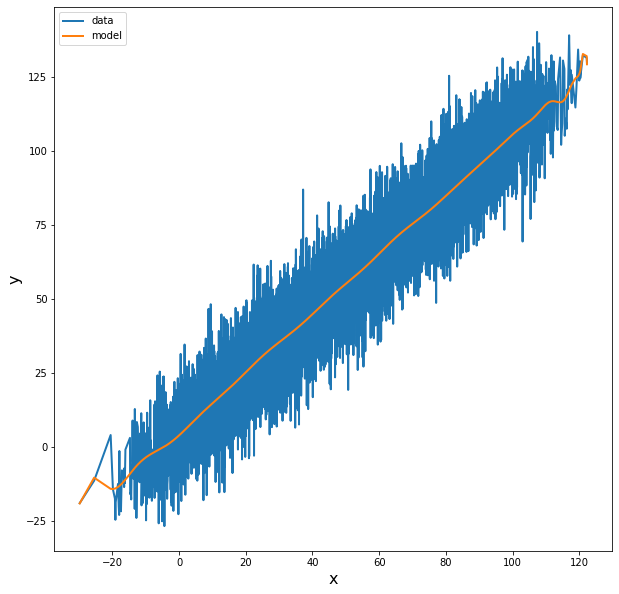

In [47]:
# Intentar distintos valores de N: 1, 5, 10, 50, 100
N = 50 
z = np.polyfit(x, y, N)
polinomio = np.poly1d(z)
plt.figure(figsize=(10,10))
plt.plot(x, y, '-', lw=2.0, label="data")
plt.plot(x, polinomio(x),'-', lw=2.0, label="model")
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.legend()
plt.show()

¿Qué valor debemos usar para N? ¿Cómo podemmos elegirlo *científicamente*?

## Calculando el error

El valor de error a utilizar depende del contexto del problema. Existen 2 errores habituales para este tipo de problemas de regresión:
* Error Absoluto Medio - Mean Absolute Error (MAE): 

$$\frac{1}{n} \sum_{i=1}^n |y_i - f(x_i)|$$

* Error Cuadrático Medio -Mean Squared Error (MSE): 

$$\frac{1}{n} \sum_{i=1}^n (y_i - f(x_i) )^2 $$



In [48]:
# Compute the error
def mae_from_model(x, y, model):
    m_nan = np.logical_or(np.isnan(x), np.isnan(y))
    m_not_nan = np.logical_not(m_nan)
    x_ = x[m_not_nan]
    y_ = y[m_not_nan]
    y_model_ = model(x_)
    mae = np.sum(np.abs(y_ - y_model_)) / len(y_)
    return mae

def mse_from_model(x, y, model):
    m_nan = np.logical_or(np.isnan(x), np.isnan(y))
    m_not_nan = np.logical_not(m_nan)
    x_ = x[m_not_nan]
    y_ = y[m_not_nan]
    y_model_ = model(x_)
    mse = np.sum((y_ - y_model_)**2) / len(y_)
    return mse

Veamos cuanto error tienen los modelos anteriores

In [49]:
N = 10
z = np.polyfit(x, y, N)
model_N = np.poly1d(z)
print("Mean Absolute Error (MAE) for N={}: {}".format(N, mae_from_model(x, y, model_N)))
print("Mean Squared Error (MSE) for N={}: {}".format(N, mse_from_model(x, y, model_N)))

Mean Absolute Error (MAE) for N=10: 7.959889933575181
Mean Squared Error (MSE) for N=10: 100.09831647386287


Ambos errores son dos formas válidas de medir el error. No existe una manera correcta de medir el error. Depende del contexto y del problema.

En realidad, los coeficientes del polinomio se encuentran minimizando el Mean Squared Error. 

In [50]:
np.polyfit?

¡Ya estábamos utilizando una forma de medir el error sin saberlo!

Recapitulemos: 
* No sabemos a priori cuál es el grado del polinomio.
* Si se fija un grado del polinomio, los coeficientes se encuentran minimizando el error cuadrático medio.

Lo anterior es frecuente en todos los modelos de Machine Learning:
* Los parámetros de un modelo se llaman **metaparámetros**. 
Son ciertos parámetros que se definen pero no forman parte de los valores que se ajustarán con los datos.
* Una vez definidos los metaparámetros, se buscan los valores de los parámetros. 

Las librerías proporcionan métodos sencillos para ajustar un modelo específico, pero encontrar los metaparámetros resulta en general un desafío más grande.

## Eligiendo el valor de N

En el caso de nuestro problema de juguete, queremos encontrar el metaparámetro $N$: el grado del polinomio.

In [51]:
degrees = list(range(1,25))
mse = []
for N in degrees:
    model = np.poly1d(np.polyfit(x, y, N))
    mse_error = mse_from_model(x, y, model) 
    mse.append(mse_error)
    print(N, mse_error)

1 100.20167175466261
2 100.19631306783779
3 100.19624737496993
4 100.1862062803767
5 100.16586303865691
6 100.15880230492185
7 100.15830412048382
8 100.15326253941721
9 100.12900576417331
10 100.09831647386287
11 100.09300936323345
12 100.09297582659849
13 100.0905358250352
14 100.09047860955104
15 100.08560240486659
16 100.07950573285065
17 100.07929660206501
18 100.0654736067741
19 100.06545358011569
20 100.06449451022029
21 100.06260718696448
22 100.06395648671267
23 100.03336701848198
24 100.03718620244278


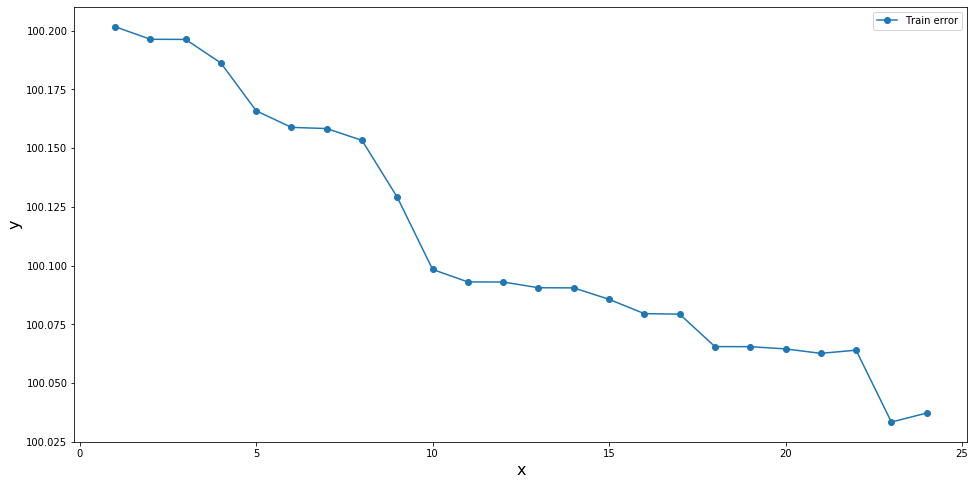

In [52]:
plt.figure(figsize=(16,8))
plt.plot(degrees, mse, 'o-', label="Train error")
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.legend()
plt.show()

A partir de lo anterior, sería razonable pensar que tenemos que tomar un polinomio suficientemente grande. 

Lo anterior es una clásica falacia o error de entrenamiento de modelos.

***Lo que buscamos no es un modelo que explique perfectamente el pasado, sino que logre predecir razonablemente bien el futuro.***

Todo polinomio o modelo extremandamente complejo logrará reproducir perfectamente los datos conocidos. La simple memorización de los resultados cumple ese objetivo. 

La tarea de los modelos de Machine Learning es generalizar. Como, a partir de ejemplos, es posible aprender parámetros que lograrán una predicción acertada.

## Sets de entrenamiento, validación, verificación, predicción

En el entrenamiento de modelos de Machine Learning, resulta común dividir los datos en conjuntos con distintas finalidades:
* **Set de entrenamiento (Training set)**: Set utilizado para entrenar el modelo, asumiento conocidos los metaparámetros.
* **Set de verificación/validación (validation set)**:  Set utilizado para evaluar el modelo y comparar metaparámetros.
* **Set de testeo (test set)**: Set para estimar el error de predicción del modelo, una vez seleccionado.

La división de los datos conocidos en conjuntos de entrenamiento - validación - testeo se hace en relación 60%-20%-20% o 80%-10%-10%. 

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_vt, y_train, y_vt = train_test_split(x, y, test_size=0.20, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_vt, y_vt, test_size=0.50, random_state=42)

In [54]:
print(x_train.shape[0], y_train.shape[0], 100*x_train.shape[0]/x.shape[0])
print(x_val.shape[0], y_val.shape[0], 100*x_val.shape[0]/x.shape[0])
print(x_test.shape[0], y_test.shape[0], 100*x_test.shape[0]/x.shape[0])

7996 7996 79.99199679871948
1000 1000 10.004001600640256
1000 1000 10.004001600640256


In [55]:
degrees = list(range(1,25))
mse_train = []
mse_test = []
values = []
for n in degrees:
    coeffs = np.polyfit(x_train, y_train, n)
    model_n = np.poly1d(coeffs)
    mse_train.append(mse_from_model(x_train, y_train, model_n))
    mse_test.append(mse_from_model(x_test, y_test, model_n))

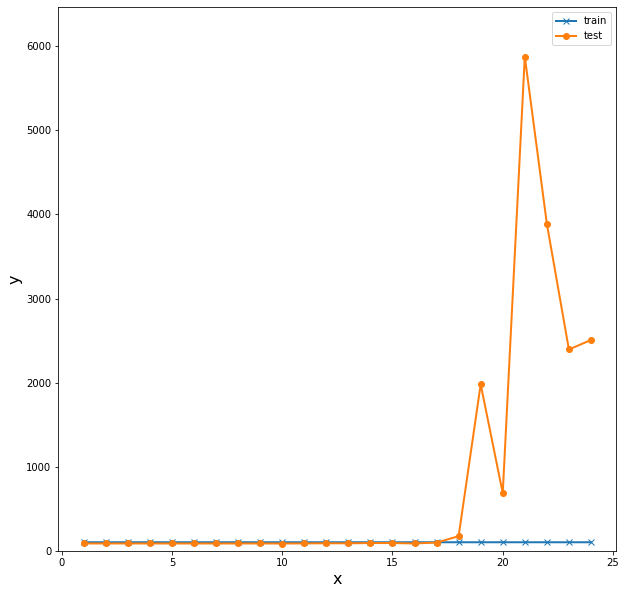

In [56]:
plt.figure(figsize=(10,10))
plt.plot(degrees, mse_train,'x-', lw=2.0, label="train")
plt.plot(degrees, mse_test,'o-', lw=2.0, label="test")
plt.xlabel("N (grado polinomio)")
plt.ylabel("Mean Squared Error")
plt.ylim([0, 1.1*max(max(mse_train), max(mse_test))])
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.legend()
plt.show()

Al combinar un set de entrenamiento con un set de contraste o validación, podemos ver que aumentar el grado del polinomio no es ventajoso. De hecho y como resultaba intuitivo, resulta mejor considerar un modelo más bien simple: una recta o un relación cuadrática.
En general, conviene aplicar la navaja de Occam: *En igualdad de condiciones, la explicación más sencilla suele ser la más probable.*  Entre dos modelos que tienen una capacidad predictiva similar, conviene tomar el más simple de ambos (con menos parámetros).

El error del modelo podemos indicarlo considerando el conjunto de testeo y el conjunto de testeo:

In [57]:
N = 10
coeffs_N = np.polyfit(x_train, y_train, N)
model_N = np.poly1d(coeffs_N)
print("Mean Absolute Error (MAE) for N={}: {}".format(N, mae_from_model(x_test, y_test, model_N)))
print("Mean Squared Error (MSE) for N={}: {}".format(N, mse_from_model(x_test, y_test, model_N)))

Mean Absolute Error (MAE) for N=10: 7.4482684626160065
Mean Squared Error (MSE) for N=10: 86.76869229393691


## ¿Como se comportaría el modelo en un conjunto distinto de datos?

Uno de los grandes problemas que se tiene en Machine Learning es que a veces no se posee un control perfecto del dataset donde se realizará la predicción. Por ejemplo, si se trata de un modelo que trabaja con fotografías, el modelo puede haberse entrenado en fotografías de buena calidad e iluminación, pero debe trabajar además con fotografías borrosas o con baja iluminación.

La única forma que un modelo funcione de la misma manera en el conjunto de datos de entrenamiento y predicción (producción) es que estos sean tan parecidos como sea posible. 

Mean Squared Error (MSE) for N=5: 0.0


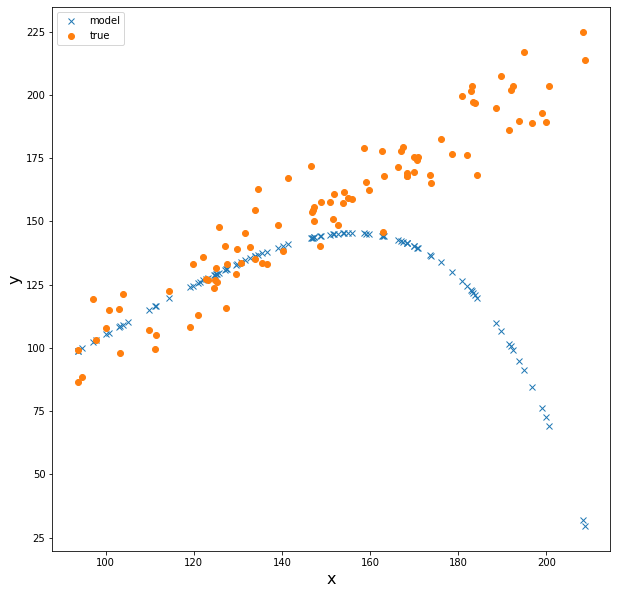

In [60]:
# Train the model
N = 5
coeffs_N = np.polyfit(x_train, y_train, N)
model_N = np.poly1d(coeffs_N)
# Get new data
x_new, y_new = get_data(N_data=100, xmin=100, xmax=200)
y_pred = model_N(x_new)
print("Mean Squared Error (MSE) for N={}: {}".format(N, mse_from_model(x_new, y_pred, model_N)))
# Plot
plt.figure(figsize=(10,10))
plt.plot(x_new, y_pred, "x", lw=2.0, label="model")
plt.plot(x_new, y_new, "o", lw=2.0, label="true")
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.legend()
plt.show()

## Actividad:
¿Qué pasa si usando un valor distinto de N? 

Volver a ejecutar todas las celdas, pero ahora con N_datos=10000. 

¿Qué cosas son diferentes esta vez?

**Respuesta**: Hacer doble click y reponder aquí.

## Moralejas:
* Resulta necesario entrenar el modelo en conjuntos de datos claramente diferenciados para poder optimizar y elegir los mejores parámetros sin sobreajustar los parámetros.
* Cada conjunto tiene una finalidad específica distinta.
* Tener más datos siempre es bueno, pero no reemplaza conocer como entrenar bien un modelo y conocer sus limitaciones.

---

## Encuesta
[Link](https://forms.office.com/Pages/ResponsePage.aspx?id=zu7OdUTRPU-clJ5rQCX8_4qs5cX1Y7dFhVdiCz848sBUMkowMkU2UjlYUjczWjFBQjMwWktBMFBHMS4u)

<img src="images/QR.png" alt="QR" width="200">